In [136]:
#Importem pandas i numpy
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [137]:
dataset_name= 'thyroidDF'
df = pd.read_csv(f'data/{dataset_name}.csv')

In [138]:
print(df.dtypes)
df.head()

age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
TBG_measured            object
TBG                    float64
referral_source         object
target                  object
patient_id               int64
dtype: object


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [139]:
df.drop(['patient_id','TBG','TBG_measured','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured'],axis='columns', inplace=True)

In [140]:
nan_percentage = df.isna().mean()
nan_columns = nan_percentage[nan_percentage > 0]
nan_columns

sex    0.033471
TSH    0.091801
T3     0.283908
TT4    0.048190
T4U    0.088203
FTI    0.087440
dtype: float64

In [141]:
columns_to_fill = ['TSH', 'T3','TT4','T4U','FTI']
df[columns_to_fill] = df[columns_to_fill].fillna(-1)
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,-1.0,-1.0,-1.0,-1.0,other,-
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,-1.0,-1.0,other,-
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,-1.0,-1.0,-1.0,-1.0,-1.0,other,-
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,-1.0,-1.0,-1.0,-1.0,-1.0,other,-
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,-1.0,-1.0,-1.0,-1.0,-1.0,other,S


In [142]:
nan_percentage = df.isna().mean()
nan_columns = nan_percentage[nan_percentage > 0]
nan_columns

sex    0.033471
dtype: float64

In [143]:
boolean_columns = df.columns[df.isin(['t', 'f']).all()]
df[boolean_columns] = df[boolean_columns].applymap(lambda x: 1 if x == 't' else 0)

df.head(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,target
0,29,F,0,0,0,0,0,0,0,1,...,0,0,0,0.3,-1.0,-1.0,-1.0,-1.0,other,-
1,29,F,0,0,0,0,0,0,0,0,...,0,0,0,1.6,1.9,128.0,-1.0,-1.0,other,-
2,41,F,0,0,0,0,0,0,0,0,...,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,other,-
3,36,F,0,0,0,0,0,0,0,0,...,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,other,-
4,32,F,0,0,0,0,0,0,0,0,...,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,other,S
5,60,F,0,0,0,0,0,0,0,0,...,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,other,-
6,77,F,0,0,0,0,0,0,0,0,...,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,other,-
7,28,F,0,0,0,0,0,0,0,0,...,0,0,0,0.7,2.6,116.0,-1.0,-1.0,SVI,-
8,28,F,0,0,0,0,0,0,0,0,...,0,0,0,1.2,1.8,76.0,-1.0,-1.0,other,-
9,28,F,0,0,0,0,0,0,0,0,...,0,0,0,1.9,1.7,83.0,-1.0,-1.0,other,-


In [144]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [145]:
hypothyroid = {'E', 'F', 'G', 'H'}
hyperthyroid = {'A', 'B', 'C', 'D'}

def classify_diagnosis(diagnosis):
    
    letters = set(diagnosis.replace('|', ''))
    
    if letters & hyperthyroid:
        return "Hyperthyroid"
    
    if letters & hypothyroid:
        return "Hypothyroid"
    
    return "Negative"

df['target'] = df['target'].apply(classify_diagnosis)
df['target'].unique()

array(['Negative', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

In [146]:
df['referral_source'].unique()

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD', 'WEST'], dtype=object)

In [147]:
dummies_referral_source = pd.get_dummies(df['referral_source'], dtype='int',drop_first=True)
df = pd.concat([df, dummies_referral_source], axis=1)
df = df.drop(['referral_source'], axis="columns")

In [148]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,target,SVHC,SVHD,SVI,WEST,other
0,29,F,0,0,0,0,0,0,0,1,...,-1.0,-1.0,-1.0,-1.0,Negative,0,0,0,0,1
1,29,F,0,0,0,0,0,0,0,0,...,1.9,128.0,-1.0,-1.0,Negative,0,0,0,0,1
2,41,F,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,Negative,0,0,0,0,1
3,36,F,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,Negative,0,0,0,0,1
4,32,F,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,Negative,0,0,0,0,1


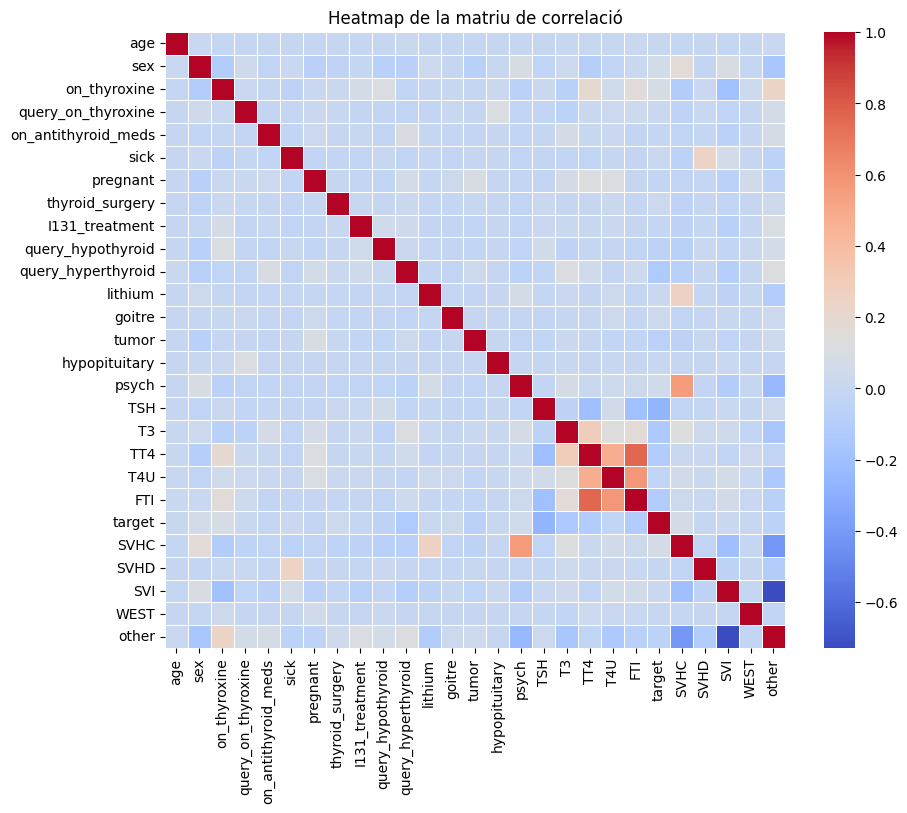

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df_cleared = df.dropna()
numeric_features = df_cleared.select_dtypes(np.number).keys()
non_numeric = [k for k in df_cleared.keys() if k not in numeric_features]
df_cleared.loc[:, non_numeric] = df_cleared.loc[:, non_numeric].apply(LabelEncoder().fit_transform)

# Calcular la matriu de correlació i mostrar un heatmap sense anotacions
correlation_matrix = df_cleared.corr(method='pearson', min_periods=1, numeric_only=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5) 
plt.title('Heatmap de la matriu de correlació')
plt.show()

In [150]:
# Omplir NaNs de 'sexe' amb 'F' si 'pregnant' és 1
df.loc[(df['sex'].isna()) & (df['pregnant'] == 1), 'sex'] = 'F'

In [153]:
df.dropna(inplace=True)

In [155]:
dummies_sex = pd.get_dummies(df['sex'], dtype='int',drop_first=True)
df = pd.concat([df, dummies_sex], axis=1)
df = df.drop(['sex'], axis="columns")
df.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,TT4,T4U,FTI,target,SVHC,SVHD,SVI,WEST,other,M
0,29,0,0,0,0,0,0,0,1,0,...,-1.0,-1.0,-1.0,Negative,0,0,0,0,1,0
1,29,0,0,0,0,0,0,0,0,0,...,128.0,-1.0,-1.0,Negative,0,0,0,0,1,0
2,41,0,0,0,0,0,0,0,0,1,...,-1.0,-1.0,-1.0,Negative,0,0,0,0,1,0
3,36,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,Negative,0,0,0,0,1,0
4,32,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,Negative,0,0,0,0,1,0


In [167]:
df['age'].nsmallest(5)

456     1
1142    1
1267    1
1921    1
3301    1
Name: age, dtype: int64

In [168]:
df['age'].nlargest(5)

8105    65526
6392    65512
5710    65511
2976      455
790        97
Name: age, dtype: int64

In [169]:
df = df[df['age'] < 100]

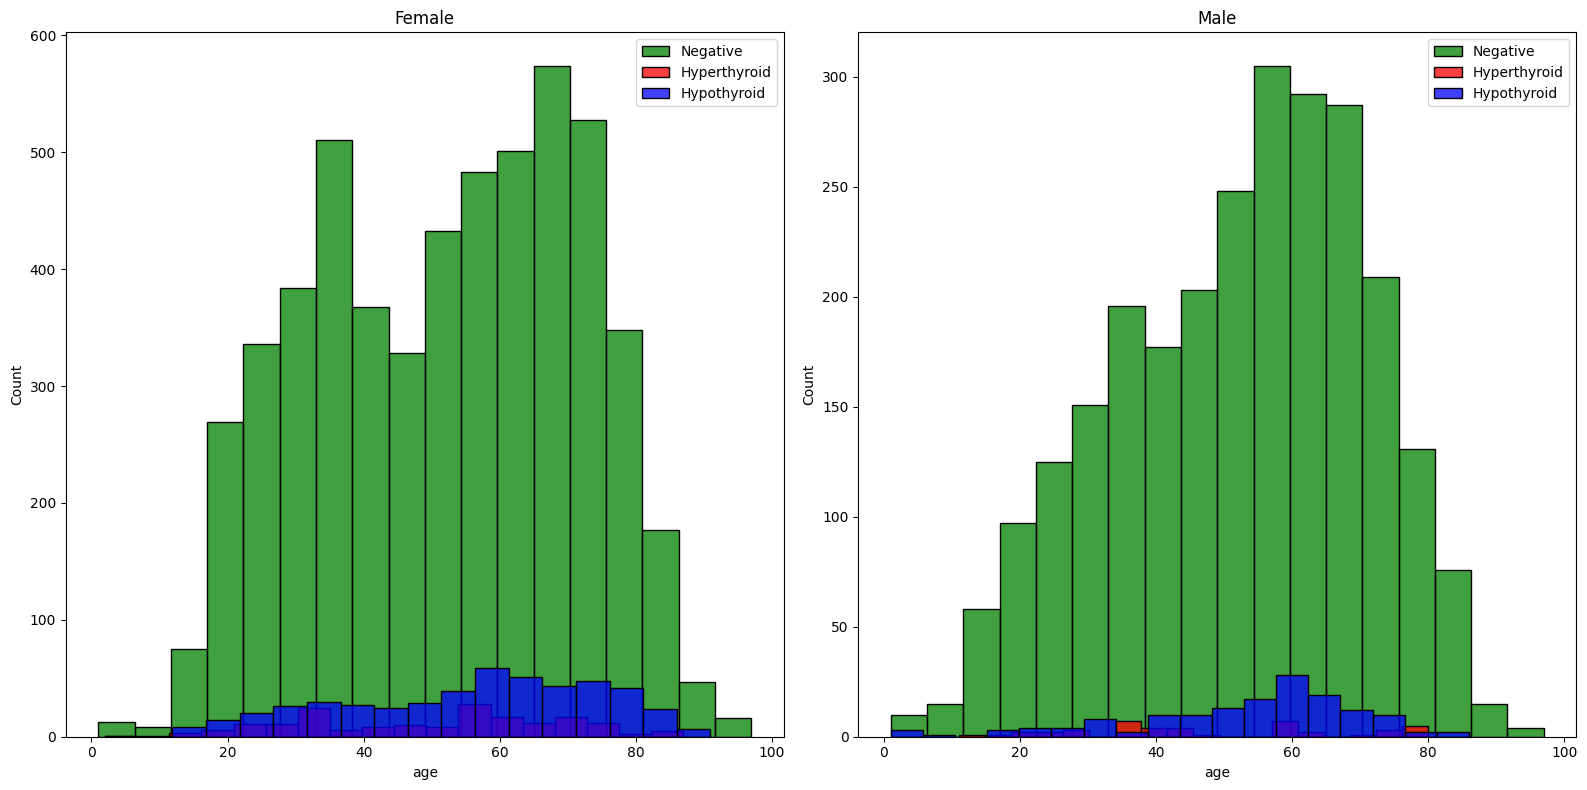

In [170]:
# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Filtrar dades per sexe
women = df[df['M'] == 0]
men = df[df['M'] == 1]

# Colors i targets
targets = ['Negative', 'Hyperthyroid', 'Hypothyroid']
colors = ['green', 'red', 'blue']

# Subplot per a dones
for target, color in zip(targets, colors):
    sns.histplot(
        data=women[women['target'] == target],
        x="age",
        bins=18,
        label=target,
        ax=axes[0],
        color=color,
        kde=False
    )
axes[0].legend()
axes[0].set_title('Female')

# Subplot per a homes
for target, color in zip(targets, colors):
    sns.histplot(
        data=men[men['target'] == target],
        x="age",
        bins=18,
        label=target,
        ax=axes[1],
        color=color,
        kde=False
    )
axes[1].legend()
axes[1].set_title('Male')

# Mostrar la gràfica
plt.tight_layout()
plt.show()


In [166]:
df['age'].nsmallest(5)


456     1
1142    1
1267    1
1921    1
3301    1
Name: age, dtype: int64